<a href="https://colab.research.google.com/github/monishsai4/MyAIStuff/blob/main/Logregmodelnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kaggle installation which is required only once


In [1]:
#!pip install -q kaggle
#from google.colab import files
#files.upload()
#!mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json
#! kaggle datasets list

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [4]:
#from google.colab import files
#files.upload()

In [21]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import copy
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression

In [22]:
    train_dataset = h5py.File('Datasets/catvnoncat/train_catvnoncat.h5', "r")
    train_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('Datasets/catvnoncat/test_catvnoncat.h5', "r")
    test_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

In [23]:
print(train_set_y_orig.shape)

(209,)


y = 1. It's acatpicture.


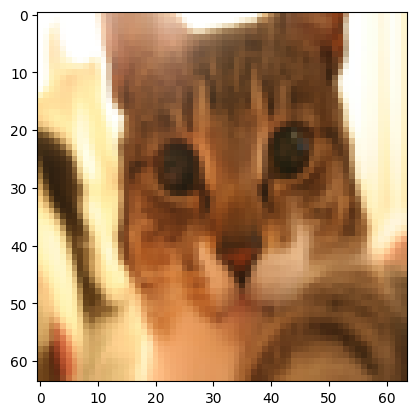

In [24]:
# Example of a picture
index = 11
plt.imshow(test_x_orig[index])
print ("y = "+ str(train_y[0,index]) + ". It's a" + classes[train_y[0,index]].decode("utf-8") + "picture.")


### **Exploring the datasets and printing their shape.**

In [25]:
m_train = train_x_orig.shape[0]
m_test = test_x_orig.shape[0]
num_px = train_x_orig.shape[1]

print ("Number of training examples: "+ str(m_train))
print ("Number of testing examples: "+ str(m_test))
print ("Each image is of size: (" + str(num_px) + ", "+ str(num_px) + ", 3)")
print ("train_x_orig shape: "+ str(train_x_orig.shape))
print ("train_y shape: "+ str(train_y.shape))
print ("test_x_orig shape: "+ str(test_x_orig.shape))
print ("test_y shape: "+ str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


### **Reshape the training and test example and flatten it.**

In [26]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T 
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
#print(train_x_flatten)
#print(train_x_flatten.shape)
train_x = train_x_flatten/255
test_x = test_x_flatten/255
#print(train_x[1])
#predictions = (train_x > 0.5)
#print("Predictions: " + str(predictions))
#print ('Accuracy: %d' % float((np.dot(train_y, predictions.T) + np.dot(1 - train_y, 1 - predictions.T)) / float(train_y.size) * 100) + '%')
#print(train_x.shape)
print ("train_x's shape: "+ str(train_x.shape))
print ("test_x's shape: "+ str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [11]:
#print(train_x[1].shape)
#print(train_x_orig[1].shape)
#print(train_set_y_orig.shape)
#train_x_orig1 = train_x[1].reshape(-1,1)
#print(train_x_orig1.shape)

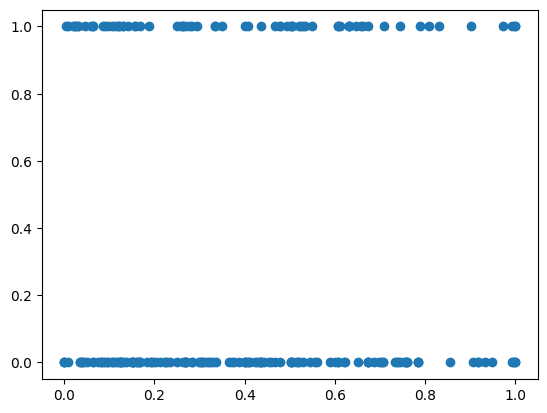

In [12]:
plt.scatter(train_x[1],train_set_y_orig)


### **Fitting the model using scikit logistic regression** 

In [13]:
lr = linear_model.LogisticRegression(C=1.0,solver='lbfgs', multi_class="ovr")
train_x_orig1 = train_x[1].reshape(-1,1)
lr.fit(train_x_orig1, train_set_y_orig)

LogisticRegression(multi_class='ovr')

In [14]:
print(lr.score(train_x_orig1, train_set_y_orig))

0.6555023923444976


In [15]:
y_pred = lr.predict(train_x_orig1)
print(classification_report(train_set_y_orig,y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       137
           1       0.00      0.00      0.00        72

    accuracy                           0.66       209
   macro avg       0.33      0.50      0.40       209
weighted avg       0.43      0.66      0.52       209



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **The above model which we built through scikit learn gives us 65% precision now lets buid our own neural network with multiple layers for logistic regression** 

In [27]:
#cheking th eshape for Xtrain and yTrain
print(train_x.shape)
print(train_y.shape)
m = train_x.shape[1]
print(m)

(12288, 209)
(1, 209)
209


In [33]:
n_x = train_x.shape[0]
n_h = 4
n_y = train_y.shape[0]
num_iterations = 7500
learning_rate = 0.01
print_cost=False

for i in range(0, num_iterations):
    parameters = {}
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    #Forward propagation

    Z1 = np.dot(W1,train_x) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = 1/(1+(np.exp(-Z2)))
    logprobs = np.multiply(np.log(A2),train_y) + np.multiply(np.log(1 - A2),1 - train_y)
    cost = - np.sum(logprobs)/m
    cost = float(np.squeeze(cost))


    #backward propagation
    dZ2 = A2 - train_y
    dW2 = np.dot(dZ2,A1.T)/m
    db2 = np.sum(dZ2,axis = 1,keepdims=True)/m
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1,train_x.T)/m
    db1 = np.sum(dZ1,axis = 1,keepdims = True)/m


    #updating parameters
    
    #W1 = copy.deepcopy(parameters["W1"])
    #b1 = parameters["b1"]
    #W2 = copy.deepcopy(parameters["W2"])
    #b2 = parameters["b2"]

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate *db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate *db2
    if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

In [35]:
#prediction for the model
Z1 = np.dot(W1,train_x) + b1
A1 = np.tanh(Z1)
Z2 = np.dot(W2,A1) + b2
A2 = 1/(1+(np.exp(-Z2)))
M2 = A2 - train_y
print(M2)
print(A2)
predictions = (A2 > 0.5)
print("Predictions: " + str(predictions))

[[ 0.4989761   0.49894772 -0.50346044  0.49439955  0.49378683  0.49721629
   0.49541643 -0.50476014  0.50011745  0.50148545  0.49446988 -0.50248693
   0.49779542 -0.50351363 -0.50424596  0.4950802   0.49495999  0.49517545
   0.49617148 -0.50378019  0.49826833  0.49825486  0.49586317  0.49698545
  -0.50412224 -0.49963828  0.49629901 -0.50031798  0.49583029 -0.5027018
   0.49569624  0.49513314  0.49679378  0.49532383  0.49457338  0.49584589
   0.49679858  0.49593494 -0.50180778  0.49819923  0.49594302 -0.50266161
  -0.50213605  0.49897765  0.49713858  0.49752063  0.49425707 -0.50017446
   0.49615154  0.49618815 -0.50366499  0.49870081  0.49583476  0.49518787
  -0.5040001   0.49481683 -0.49988562 -0.50349721  0.49703382 -0.50161001
  -0.4998614  -0.50515836  0.49609701  0.49589081  0.50020804  0.49571715
   0.50062931  0.49466129 -0.5014272   0.4934384   0.49654025 -0.50066266
   0.49593743  0.4976974   0.49641188  0.49676315  0.49568691  0.49415485
   0.49435981  0.49721849  0.49275707  

In [32]:
#accuracy of the model
print ('Accuracy: %d' % float((np.dot(train_y, predictions.T) + np.dot(1 - train_y, 1 - predictions.T)) / float(train_y.size) * 100) + '%')

Accuracy: 65%
